## Task 4

In [13]:
import numpy as np
import spectral
import matplotlib.pyplot as plt


img = spectral.open_image('/pio/scratch/2/ED2015/APEX/APEX_OSD_Package_1.0/APEX_OSD_Package_1.0/APEX_OSD_V1_calibr_cube.hdr')
data = img.load()

n, m, d = data.shape
data = data.reshape(-1,d)


/pio/os/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  import sys


In [14]:
print(n,m,d)

1500 1000 285


In [38]:

from sklearn.cluster import k_means


centroids, labels, _ = k_means(data[:, :], 5)



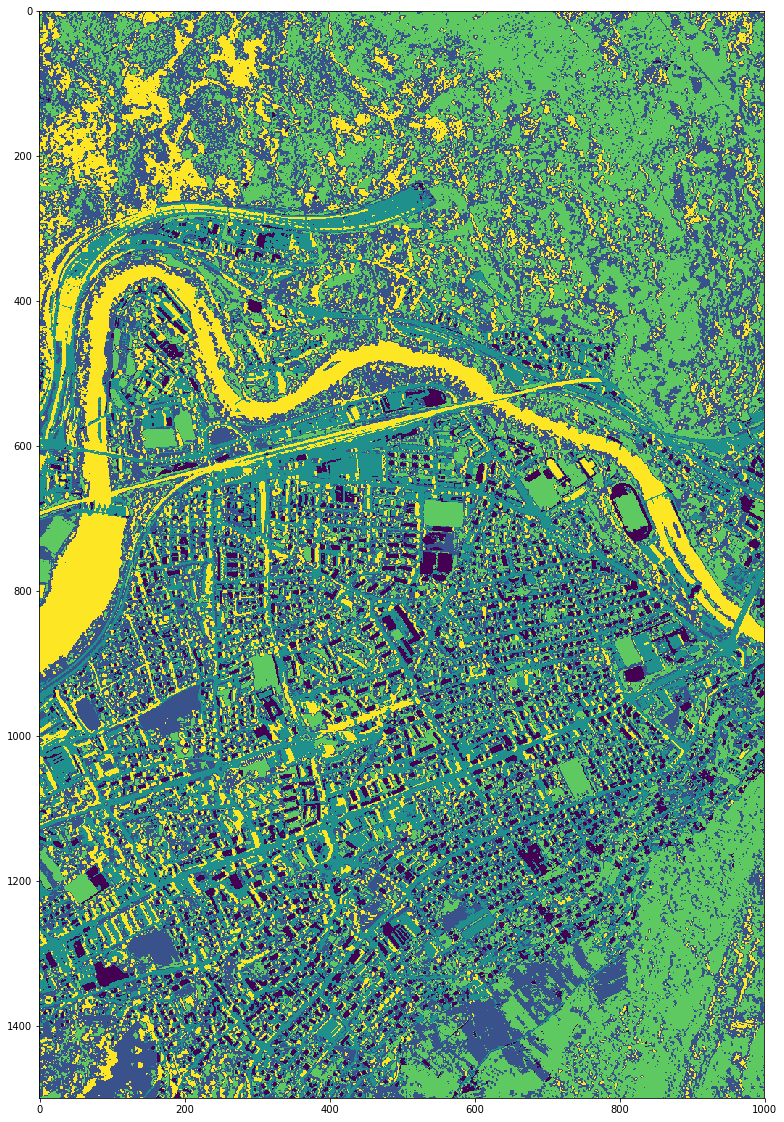

In [39]:
import matplotlib.image as mpimg

plt.figure(figsize=(30,20))
plt.imshow(labels.reshape(n, -1))
plt.show()

In [43]:
def dunn_index(X, labels):
    '''
    X:: num_samples x num_features
    labels :: num_samples
    '''

    ## min of (min distnace beetween clusters)/ (max cluster diamteter)
    _, d = X.shape
    
    label_unique = np.unique(labels)
    
    k = label_unique.size

    c = np.zeros((k,d))
    out = np.zeros(k)
    
    for i, cluster in enumerate(label_unique):
        choice = (labels == cluster)
        nChoice = np.sum(choice)
        if nChoice == 0:
            continue

        c[i] = np.sum(X * choice[:, np.newaxis], axis=0)/nChoice
        out[i] = np.max(np.sqrt(np.sum((X[choice] - c[i])**2, axis=1)))
    

    
    dists = -2 * np.dot(c, c.T) + np.sum(c**2,axis=1) + np.sum(c**2, axis=1)[:, np.newaxis]
    np.fill_diagonal(dists, np.max(dists)*100000)
    dists = np.sqrt(dists)
      
    delta = np.max(out)
    minbtwn = np.min(dists)
    
    return np.sqrt(minbtwn)/np.sqrt(delta)

def davies_bouldin(X, labels):
    
    
    _, d = X.shape
    
    label_unique = np.unique(labels)
    
    k = label_unique.size

    c = np.zeros((k,d))
    s = np.zeros(k)

    for i, cluster in enumerate(label_unique):
        choice = (labels == cluster)
        nChoice = np.sum(choice)
        if nChoice == 0:
            continue

        c[i] = np.sum(X * choice[:, np.newaxis], axis=0)/nChoice
        s[i] = np.sum(np.sqrt(np.sum((X[choice] - c[i])**2, axis=1)))/nChoice
    
    
    
    dists = -2 * np.dot(c, c.T) + np.sum(c**2,axis=1) + np.sum(c**2, axis=1)[:, np.newaxis]
    np.fill_diagonal(dists, np.max(dists)*100000)
    dists = np.sqrt(dists)
    
    R = np.max((s[np.newaxis, :] + s) / dists, axis = 1)
    
        
    return np.sum(R)/k

    _, d = X.shape
    

    
        
from sklearn.metrics import silhouette_score
def score(X, labels):
   # print("Silhouette Coefficient: {}".format(silhouette_score(X, labels)))
    print("Dunn Index: {}".format(dunn_index(X, labels)))
    print("Davies Bouldin Index: {}".format(davies_bouldin(X, labels)))
        

In [44]:
score(data, labels)

Dunn Index: 0.3429377858006829
Davies Bouldin Index: 0.9122526323716151
